## Downloading Dataset

In [338]:
# !wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip

In [339]:
# !unzip bike+sharing+dataset.zip

## Importing Packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## MLFlow


In [66]:
import mlflow



In [67]:
mlflow.set_experiment("Bike Sharing Prediction Pipeline_assignment")

<Experiment: artifact_location='file:///home/divyaansh/Downloads/mlruns/273438647958593529', creation_time=1724769134516, experiment_id='273438647958593529', last_update_time=1724769134516, lifecycle_stage='active', name='Bike Sharing Prediction Pipeline_assignment', tags={}>

## Data Engineering

### Data Collection:
Loading Dataset into pandas dataframe

In [68]:
df = pd.read_csv('hour.csv')
print(df.head())
print(df.info())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

### Correlation Heat Map


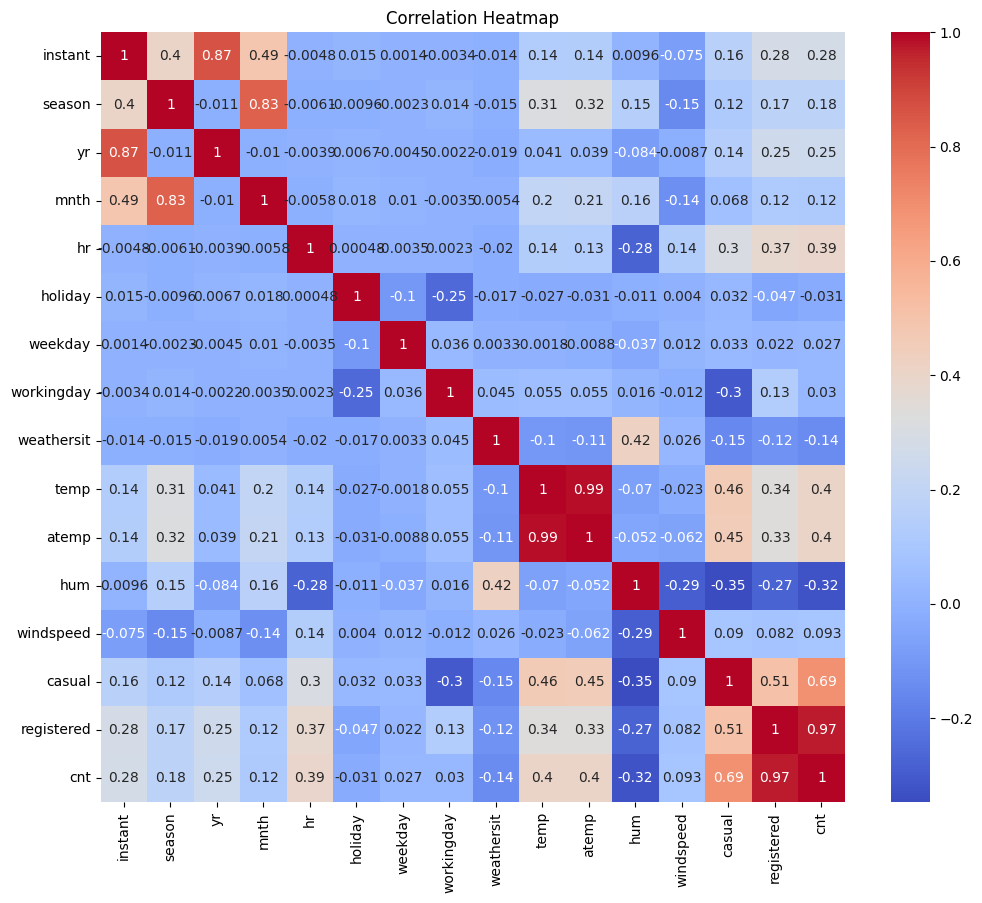

In [406]:
# # df['dteday'] = pd.to_datetime(df.dteday)

# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

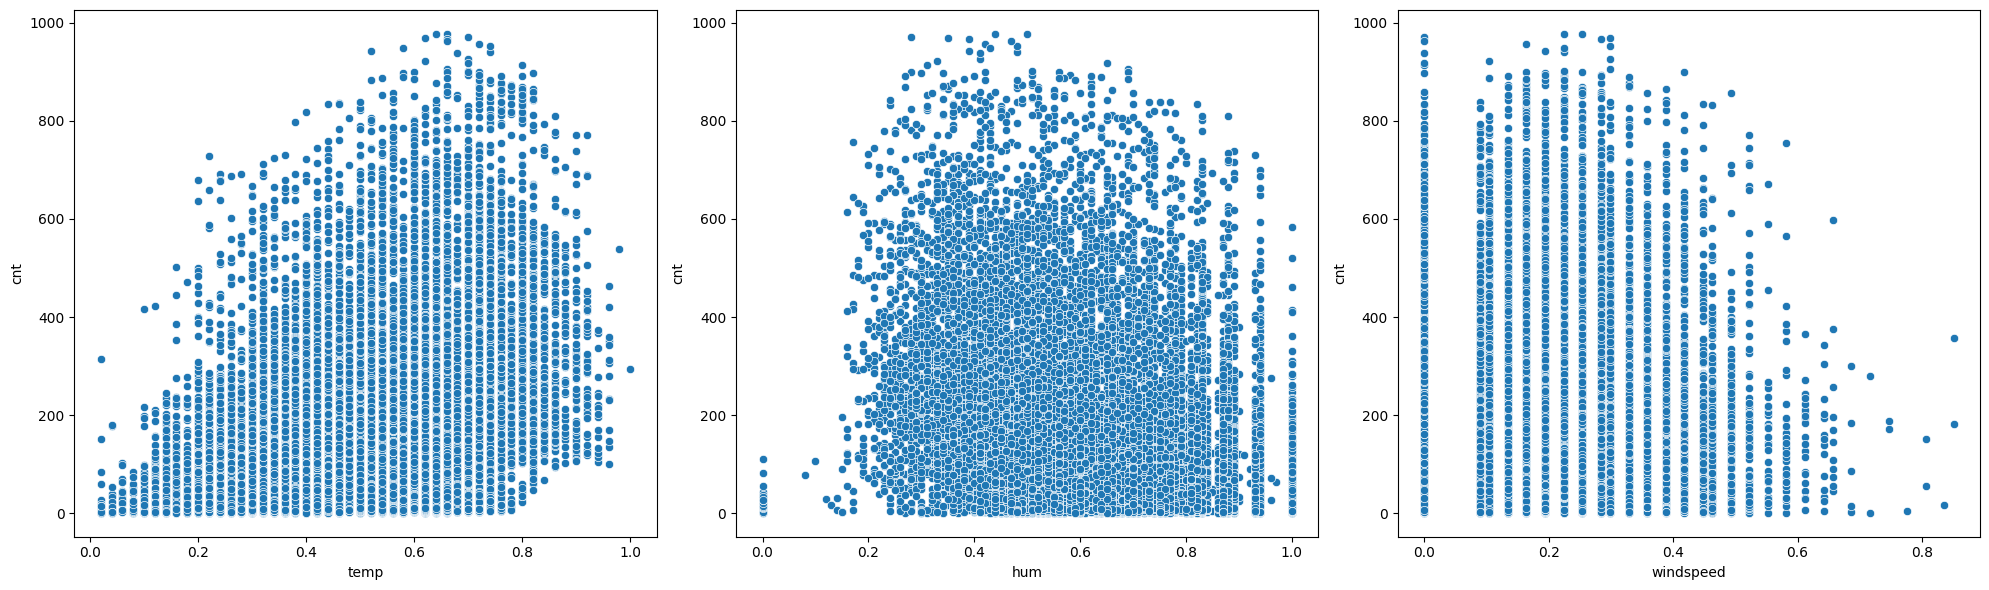

In [377]:
# fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# sns.scatterplot(data=df, x='temp', y='cnt', ax=axes[0])
# sns.scatterplot(data=df, x='hum', y='cnt', ax=axes[1])
# sns.scatterplot(data=df, x='windspeed', y='cnt', ax=axes[2])
# plt.tight_layout()
# plt.show()

In [69]:
# # # Create interaction features
df['temp_windspeed'] = df['temp'] * df['windspeed']
df['temp_hum'] = df['temp'] * df['hum']

# # Visualize new interaction features
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# sns.scatterplot(data=df, x='temp_windspeed', y='cnt', ax=axes[0])
# axes[0].set_title('temp * windspeed vs. bike rentals')
# sns.scatterplot(data=df, x='temp_hum', y='cnt', ax=axes[1])
# axes[1].set_title('temp * hum vs. bike rentals')
# plt.tight_layout()
# plt.show()

### Data Preprocessing:

* Handling Missing Values: Check for and handle any missing
values.
* Feature Engineering: Create additional features if necessary (e.g., day/night feature based on hour).
* Normalization/Standardization: Normalize numerical features such as temp, hum, and windspeed.

In [70]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   temp_windspeed  temp_hum day_night  
0             0.0    0.1944     night  
1           

In [71]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
print(df.head())


       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  temp_windspeed  temp_hum day_night  
0  0.24  0.2879  0.81        0.0   16             0.0    0.1944     night  
1  0.22  0.2727  0.80        0.0   40             0.0    0.1760     night  
2  0.22  0.2727  0.80        0.0   32             0.0    0.1760     night  
3  0.24  0.2879  0.75        0.0   13             0.0    0.1800     night  
4  0.24  0.2879  0.75        0.0    1             0.0    0.1800     night  


In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dteday          17379 non-null  object 
 1   season          17379 non-null  int64  
 2   yr              17379 non-null  int64  
 3   mnth            17379 non-null  int64  
 4   hr              17379 non-null  int64  
 5   holiday         17379 non-null  int64  
 6   weekday         17379 non-null  int64  
 7   workingday      17379 non-null  int64  
 8   weathersit      17379 non-null  int64  
 9   temp            17379 non-null  float64
 10  atemp           17379 non-null  float64
 11  hum             17379 non-null  float64
 12  windspeed       17379 non-null  float64
 13  cnt             17379 non-null  int64  
 14  temp_windspeed  17379 non-null  float64
 15  temp_hum        17379 non-null  float64
 16  day_night       17379 non-null  object 
dtypes: float64(6), int64(9), object

In [73]:
# df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')

In [74]:
df.drop(columns=['dteday'], inplace=True)

In [75]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          17379 non-null  category
 1   yr              17379 non-null  category
 2   mnth            17379 non-null  category
 3   hr              17379 non-null  category
 4   holiday         17379 non-null  category
 5   weekday         17379 non-null  category
 6   workingday      17379 non-null  category
 7   weathersit      17379 non-null  category
 8   temp            17379 non-null  float64 
 9   atemp           17379 non-null  float64 
 10  hum             17379 non-null  float64 
 11  windspeed       17379 non-null  float64 
 12  cnt             17379 non-null  int64   
 13  temp_windspeed  17379 non-null  float64 
 14  temp_hum        17379 non-null  float64 
 15  day_night       17379 non-null  object  
dtypes: category(8), float64(6), int64(1), object(1)
memory usa

In [76]:
X = df.drop(columns=['cnt'])


In [77]:
y = df['cnt']


### Importing some other Packages for pipelining

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

## Numerical Process pipeline

### Numerical Features

In [79]:
df['temp_windspeed'] = df['temp'] * df['windspeed']
df['temp_hum'] = df['temp'] * df['hum']

numerical_features = ['temp', 'hum', 'windspeed', 'temp_windspeed', 'temp_hum']
# numerical_features = ['temp', 'hum', 'windspeed']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler())  # Normalize using MinMaxScaler
])


## Categorical Process Pipeline

### Categorical Features with one hot encoding

In [448]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('onehot', OneHotEncoder(sparse_output = False, drop = 'first'))
                                 ])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
        remainder='passthrough'  # Pass through remaining features without transformation

)


### Categorical features with target_encoder

In [80]:
import category_encoders as ce
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', ce.TargetEncoder())
])
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
        remainder='passthrough'  # Pass through remaining features without transformation

)


## Final pipeline with RandomForest 

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config

final_pipeline_random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
set_config(display='diagram')
final_pipeline_random_forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'temp_windspeed',
                                                   'temp_hum']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['season', 'weathersit',
                                                   'day_night'])])),
                ('model', RandomForestRegressor(random_state=42))])

## Final Pipeline with Linear Regression package 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import set_config

final_pipeline_library_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
set_config(display='diagram')
final_pipeline_library_regression

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'temp_windspeed',
                                                   'temp_hum']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['season', 'weathersit',
                                                   'day_night'])])),
                ('model', LinearRegression())])

## Fnal Pipeline with custom Linear Regression 

In [82]:
 from sklearn import set_config

import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class CustomLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.theta_ = None

    def fit(self, X, y):
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        self.theta_ = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        return self

    def predict(self, X):
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        return X_with_intercept @ self.theta_

    def score(self, X, y):
        from sklearn.metrics import r2_score
        y_pred = self.predict(X)
        return r2_score(y, y_pred)


from sklearn.pipeline import Pipeline

final_pipeline_custom_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CustomLinearRegressor())
])
set_config(display='diagram')
final_pipeline_custom_regression


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'temp_windspeed',
                                                   'temp_hum']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['season', 'weathersit',
                                                   'day_night'])])),
                ('model', CustomLinearRegressor())])

### Split the data (20:80) ratio

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Model Development

### Model Selection

In [84]:

final_pipeline_custom_regression.fit(X_train, y_train)


/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .filln

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'temp_windspeed',
                                                   'temp_hum']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['season', 'weathersit',
                                                   'day_night'])])),
                ('model', CustomLinearRegressor())])

### Visualizing the importance of each feature

In [34]:
# Extract the trained RandomForest model from the pipeline
trained_model = final_pipeline_random_forest.named_steps['model']

# Get feature importances from the trained model
feature_importances = trained_model.feature_importances_

# Get the column names after preprocessing
# This will include numerical and one-hot encoded categorical features
preprocessed_columns = final_pipeline_random_forest.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
feat_importance = pd.DataFrame(feature_importances, index=preprocessed_columns, columns=["Importance"])

# Sort the feature importances in descending order
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Display the sorted feature importances
print(feat_importance)

# feat_importance = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ["Importance"])
# feat_importance.sort_values(by = 'Importance', ascending=False, inplace = True)


                       Importance
remainder__hr            0.597446
num__temp                0.116817
remainder__yr            0.080812
remainder__workingday    0.057787
num__hum                 0.020096
remainder__mnth          0.019589
remainder__atemp         0.019203
cat__0                   0.017937
cat__1                   0.017146
cat__2                   0.014104
num__temp_hum            0.012378
remainder__weekday       0.011437
num__temp_windspeed      0.007622
num__windspeed           0.005337
remainder__holiday       0.002290


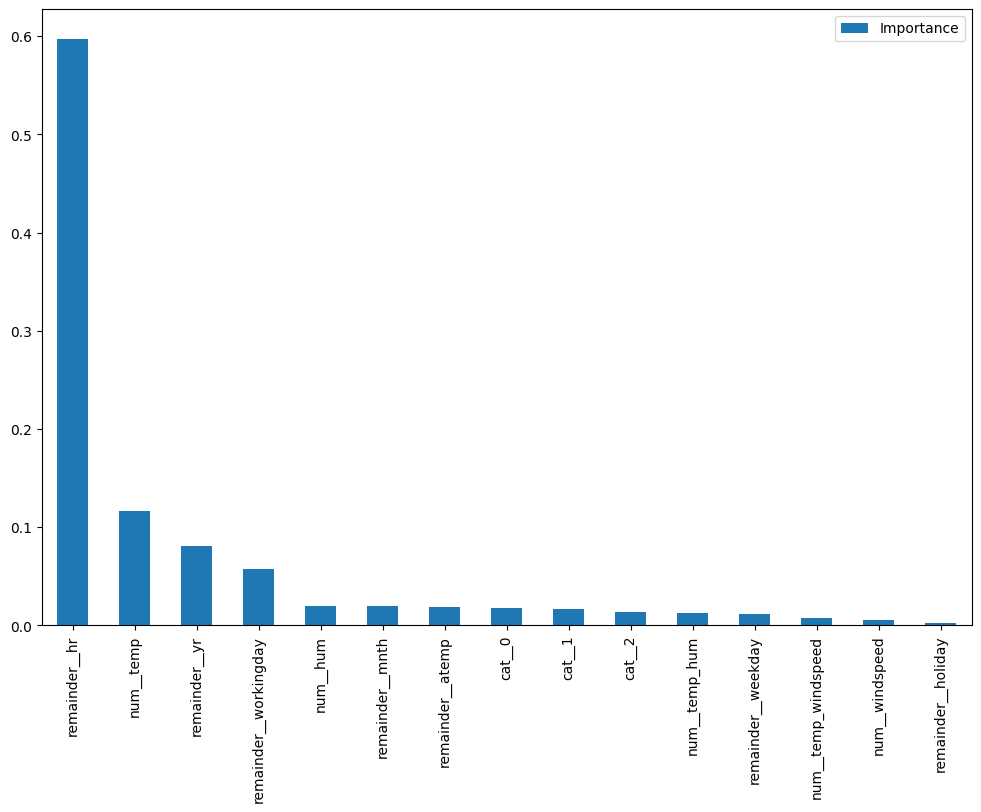

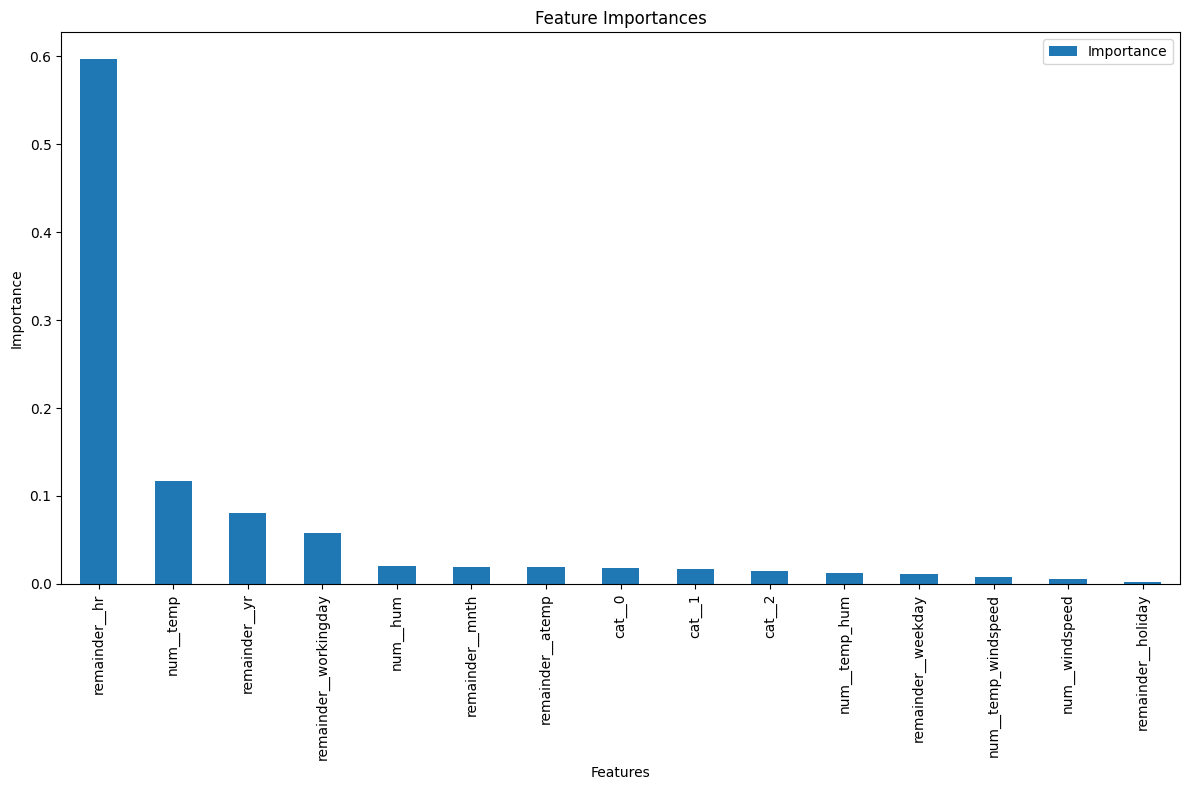

In [35]:
feat_importance.plot(kind = 'bar', figsize=(12,8))
feat_importance.plot(kind='bar', figsize=(12, 8))

plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

# Tight layout to ensure everything fits
plt.tight_layout()

# Save the figure
plot_path = "feature_importances.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')





### Model Evaluation

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = final_pipeline_custom_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 14979.102588663238
R-squared: 0.5269569553509119


/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [37]:
print(df.isna().sum())


season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
cnt               0
temp_windspeed    0
temp_hum          0
day_night         0
dtype: int64


In [38]:
print(np.isnan(y_test).sum())
print(np.isnan(y_pred).sum())

0
0


## ML Pipeline

In [86]:
from sklearn import set_config
import imgkit
# final_pipeline = Pipeline([
#     ('num_preprocess', numerical_pipeline),
#     ('cat_preprocess', categorical_pipeline),
#     ('model', RandomForestRegressor(n_estimators=100, random_state=42))
# ])
set_config(display = 'diagram')
final_pipeline_custom_regression
html_representation = final_pipeline_custom_regression._repr_html_()

# Save the HTML to a file
with open("pipeline_diagram.html", "w") as f:
    f.write(html_representation)

# Convert the HTML file to a PNG image
imgkit.from_file("pipeline_diagram.html", "pipeline_diagram.png")


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## MLflow logs

In [87]:
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, final_pipeline_random_forest.predict(X_train))
with mlflow.start_run():
    mlflow.set_tag("model_type", "custom Linear Regression with target encoder, extra features")
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
#     mlflow.log_artifact(plot_path)
    mlflow.log_artifact("pipeline_diagram.png")
#     mlflow.log_param("learning_rate", 0.01)
#     mlflow.log_param("n_iterations", 1000)
    mlflow.sklearn.log_model(
        final_pipeline_custom_regression, 
        "final_pipeline_custom_regression",
        signature=signature
    )


    

/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/divyaansh/miniconda3/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/divyaansh/miniconda3/lib/python3.12/site-packages/mlflow/types/utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). 